In [1]:
'''The goal of this script is to plot the master pattern generated via EMEBSD'''

'The goal of this script is to plot the master pattern generated via EMEBSD'

In [2]:
print("Importing libraries...")

Importing libraries...


In [3]:
import numpy as np
import h5py

import sys
import ErnouldsMethod


In [4]:
file = '/Users/crestiennedechaine/Scripts/DIC-HREBSD/DIC-HREBSD/Inputs/EBSDpattern_Al_July222025.h5'
case_name = 'BASELINE_Al_July222025'

In [5]:
#print out the file structure
with h5py.File(file, 'r') as f:
    print("File structure:")
    f.visititems(lambda name, obj: print(name, obj.shape if isinstance(obj, h5py.Dataset) else "Group"))
    print("\nData in 'EBSDpattern':")

#save the EBSD patterns
with h5py.File(file, 'r') as f:
    ebsd_patterns = f['EMData/EBSD/EBSDpatterns'] #where the EBSD patterns are stored
    data = ebsd_patterns[:]



File structure:
CrystalData Group
CrystalData/AtomData (5, 1)
CrystalData/Atomtypes (1,)
CrystalData/CreationDate (1,)
CrystalData/CreationTime (1,)
CrystalData/Creator (1,)
CrystalData/CrystalSystem (1,)
CrystalData/LatticeParameters (6,)
CrystalData/Natomtypes (1,)
CrystalData/ProgramName (1,)
CrystalData/Source (1,)
CrystalData/SpaceGroupNumber (1,)
CrystalData/SpaceGroupSetting (1,)
EMData Group
EMData/EBSD Group
EMData/EBSD/EBSDpatterns (1, 2400, 2400)
EMData/EBSD/EulerAngles (1, 3)
EMData/EBSD/numangles (1,)
EMData/EBSD/xtalname (1,)
EMheader Group
EMheader/EBSD Group
EMheader/EBSD/Date (1,)
EMheader/EBSD/Duration (1,)
EMheader/EBSD/HostName (1,)
EMheader/EBSD/ProgramName (1,)
EMheader/EBSD/StartTime (1,)
EMheader/EBSD/StopTime (1,)
EMheader/EBSD/UserEmail (1,)
EMheader/EBSD/UserLocation (1,)
EMheader/EBSD/UserName (1,)
EMheader/EBSD/Version (1,)
Manufacturer (1,)
NMLfiles Group
NMLfiles/EMEBSDNML (87,)
NMLparameters Group
NMLparameters/EBSDNameList Group
NMLparameters/EBSDNameLi

In [6]:
#print the shape of the EBSD patterns
print(f"Shape of EBSD patterns: {data.shape}")


Shape of EBSD patterns: (1, 2400, 2400)


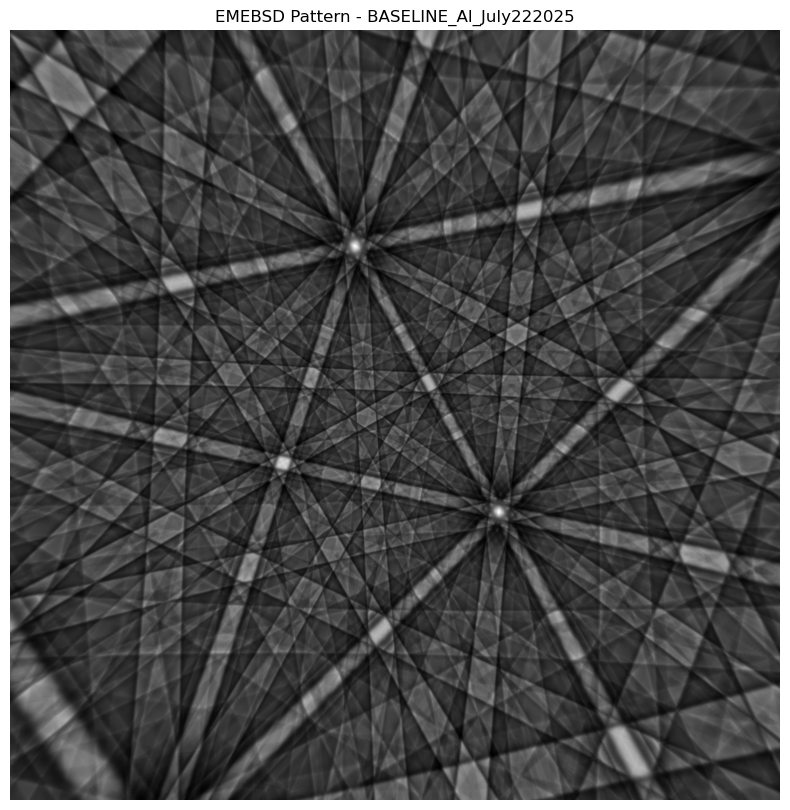

In [7]:
#convert the data to a numpy array
data = np.array(data)
#remove the first dimension if it is 1
if data.ndim > 2 and data.shape[0] == 1:
    data = data[0]
else:
    print("Data has more than one dimension, keeping the original shape.")

#plot the EBSD patterns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(data, cmap='gray')
plt.title(f'EMEBSD Pattern - {case_name}')
#turn off axis for better visualization
plt.axis('off')

#save the figure
plt.savefig(f'/Users/crestiennedechaine/Scripts/DIC-HREBSD/DIC-HREBSD/results/PCSensitivityAnalysis/{case_name}_EMEBSD_Pattern.png', dpi=300, bbox_inches='tight')

plt.show()
